# Import các thư viện cần thiết

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('Data/BA_Reviews_processed.csv')
df.head()

,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment
0,1.0,"""Service level far worse then Ryanair""",L Keele,2023-11-19,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-23,1.0,1.0,1.0,1.0,no,NaN,3.0,3.0
1,3.0,"""do not upgrade members based on status""",Austin Jones,2023-11-19,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-23,2.0,3.0,1.0,2.0,no,A320,1.0,2.0
2,8.0,"""Flight was smooth and quick""",M A Collie,2023-11-16,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-23,3.0,3.0,4.0,3.0,yes,A320,4.0,3.0
3,1.0,"""Absolutely hopeless airline""",Nigel Dean,2023-11-16,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2023-12-22,3.0,3.0,1.0,1.0,no,NaN,3.0,3.0
4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,2023-11-14,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-23,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0


### Biểu đồ 1:
- Tiêu đề: Đóng góp của từng hạng ghế trên tổng các chuyến bay theo từng năm
- Loại biểu đồ: Area Chart
- Lý do chọn: Area Chart là một cách có thể thể hiện sự thay đổi trên tổng thể theo thời gian một cách tốt nhất, chính vì thế sử dụng Area Chart để có thể dễ quan sát sự thay đổi về số lượng các hạng ghế trên tổng thể theo thời gian một cách trực quan hơn.

In [44]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Year']=(df['Datetime']).dt.year
df.head()

,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Year
0,1.0,"""Service level far worse then Ryanair""",L Keele,2023-11-19,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-23,1.0,1.0,1.0,1.0,no,NaN,3.0,3.0,2023
1,3.0,"""do not upgrade members based on status""",Austin Jones,2023-11-19,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-23,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2023
2,8.0,"""Flight was smooth and quick""",M A Collie,2023-11-16,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-23,3.0,3.0,4.0,3.0,yes,A320,4.0,3.0,2023
3,1.0,"""Absolutely hopeless airline""",Nigel Dean,2023-11-16,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2023-12-22,3.0,3.0,1.0,1.0,no,NaN,3.0,3.0,2023
4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,2023-11-14,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-23,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,2023


In [45]:
seattype_df = df.pivot_table(index='Year', columns='SeatType', aggfunc='size', fill_value=0)
seattype_df

SeatType,Business Class,Economy Class,First Class,Premium Economy
Year,,,,
2011,0,1,1,1
2012,4,7,0,1
2014,182,207,26,48
2015,256,347,58,73
2016,153,287,58,72
2017,168,334,22,48
2018,104,165,23,32
2019,101,210,14,31
2020,34,59,3,8


Text(0.5, 1.0, 'Taking Part of SeatTypes Over Time')

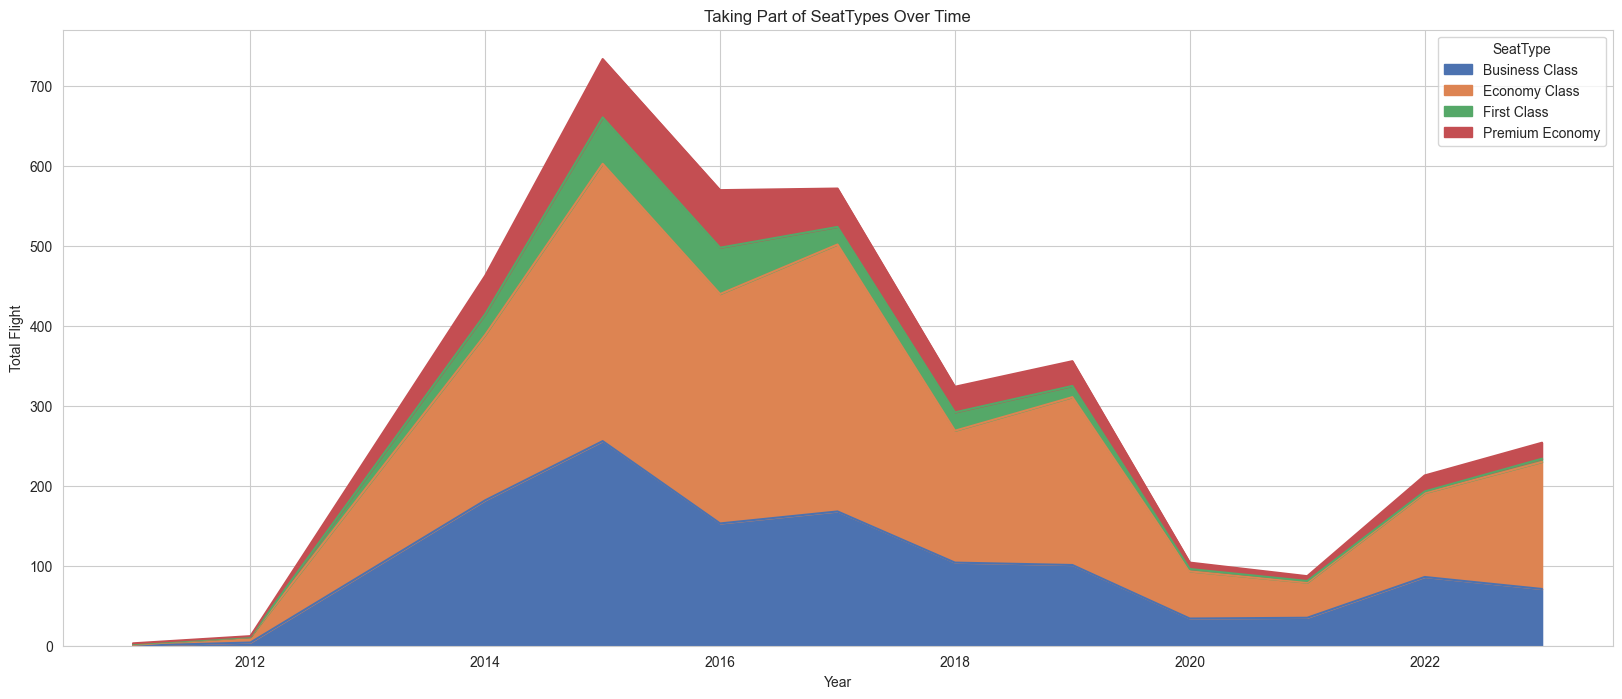

In [46]:
seattype_df.plot.area(color=['#4c72b0', '#dd8452', '#55a868', '#c44e52'], figsize = (20,8))  
plt.xlabel('Year')
plt.ylabel('Total Flight')
plt.title('Taking Part of SeatTypes Over Time')